In [ ]:
!pip install geopandas folium matplotlib shapely

In [ ]:
# Import required libraries
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.ops import nearest_points
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
city_boundary = gpd.read_file("/content/drive/MyDrive/Mental Health Location BDC 2024 Datafiles/toronto-boundary/citygcs_regional_mun_wgs84.shp")
ttc_routes = gpd.read_file("/content/drive/MyDrive/Mental Health Location BDC 2024 Datafiles/ttc-shapefile/TTC_SUBWAY_LINES_WGS84.shp")
bus_routes = gpd.read_file("/content/drive/MyDrive/Mental Health Location BDC 2024 Datafiles/Toronto_TTC_Routes/Toronto_TTC_Routes.shp")
schools = gpd.read_file("/content/drive/MyDrive/Mental Health Location BDC 2024 Datafiles/School locations-all types data - 4326/School locations-all types data - 4326.shp")
mental_health_services = gpd.read_file("/content/drive/MyDrive/Mental Health Location BDC 2024 Datafiles/mental-health-locations/YOUTH_MENTALHEALTH_WGS84.shp")
neighborhoods = gpd.read_file("/content/drive/MyDrive/Mental Health Location BDC 2024 Datafiles/neighborhood_shapefile/NEIGHBORHOODS_WGS84_2.shp")

In [ ]:
# Convert geographical vector data (.shp) into visual stencils (.crs)
ttc_routes = ttc_routes.to_crs(city_boundary.crs)
mental_health_services = mental_health_services.to_crs(city_boundary.crs)
bus_routes = bus_routes.to_crs(city_boundary.crs)
neighborhoods = neighborhoods.to_crs(city_boundary.crs)


In [ ]:
from shapely.geometry import LineString


<ipython-input-15-0bb5d9761c50>:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


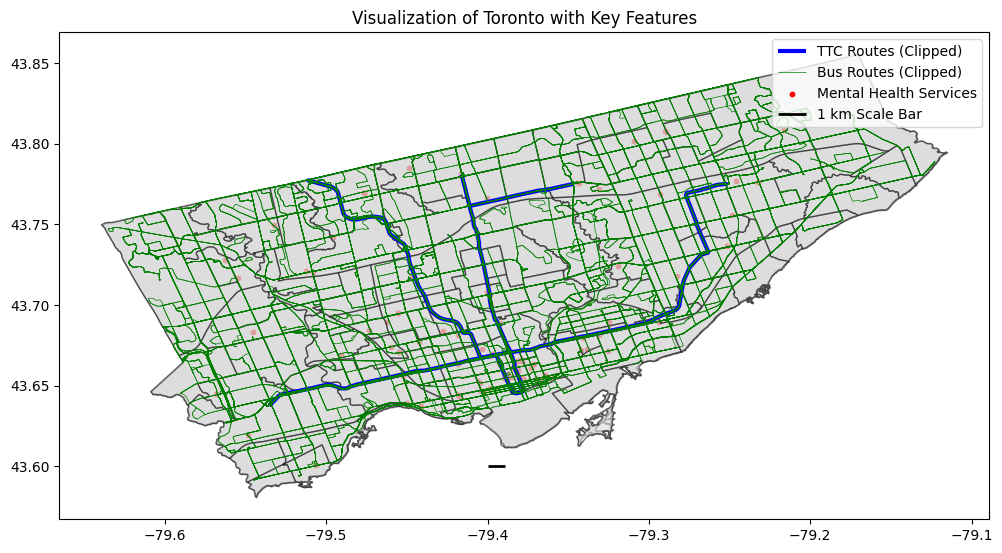

In [ ]:
# Assuming city_boundary, neighborhoods, ttc_routes, bus_routes, and mental_health_services are GeoDataFrames
# Clip TTC and bus routes to the city boundary
ttc_routes_clipped = gpd.clip(ttc_routes, city_boundary)
bus_routes_clipped = gpd.clip(bus_routes, city_boundary)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))
ttc_routes_clipped.plot(ax=ax, color="blue", linewidth=3, label="TTC Routes (Clipped)")
bus_routes_clipped.plot(ax=ax, color="green", linewidth=0.5, label="Bus Routes (Clipped)")
mental_health_services.plot(ax=ax, color="red", markersize=10, label="Mental Health Services")
city_boundary.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5, label="City Boundary")
neighborhoods.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5, label="City Boundary")


# Add scale bar
scale_bar = LineString([(-79.4, 43.6), (-79.389, 43.6)])  # Approx. 1 km
gpd.GeoSeries([scale_bar]).plot(ax=ax, color="black", linewidth=2, label="1 km Scale Bar")

# Add legend and title
plt.legend()
plt.title("Visualization of Toronto with TTC Routes and Mental Health Services")
plt.show()

In [ ]:
neighborhoods_info = "/content/drive/MyDrive/Mental Health Location BDC 2024 Datafiles/processed_neighborhoods_with_income.xlsx"
neighborhoods_info_df = pd.read_excel(neighborhoods_info)
neighborhoods_info_df.head()



,Neighborhood Name,Total Adolescents,Median Income After Tax,Number
0,West Humber-Clairville,3345,31600,1
1,Mount Olive-Silverstone-Jamestown,4455,28400,2
2,Thistletown-Beaumond Heights,1025,30600,3
3,Rexdale-Kipling,970,31800,4
4,Elms-Old Rexdale,1320,32400,5


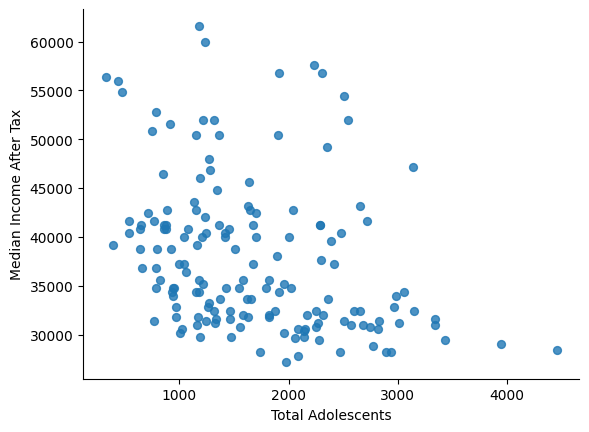

In [ ]:
# @title Total Adolescents vs Median Income After Tax

from matplotlib import pyplot as plt
neighborhoods_info_df.plot(kind='scatter', x='Total Adolescents', y='Median Income After Tax', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

   Neighborhood Number  Total Adolescents  Median Income After Tax
0                   97                785                    52800
1                   27               2820                    30600
2                   38               1700                    40000
3                   31               1660                    33600
4                   16               2650                    43200
Total Adolescents          0
Median Income After Tax    0
dtype: int64


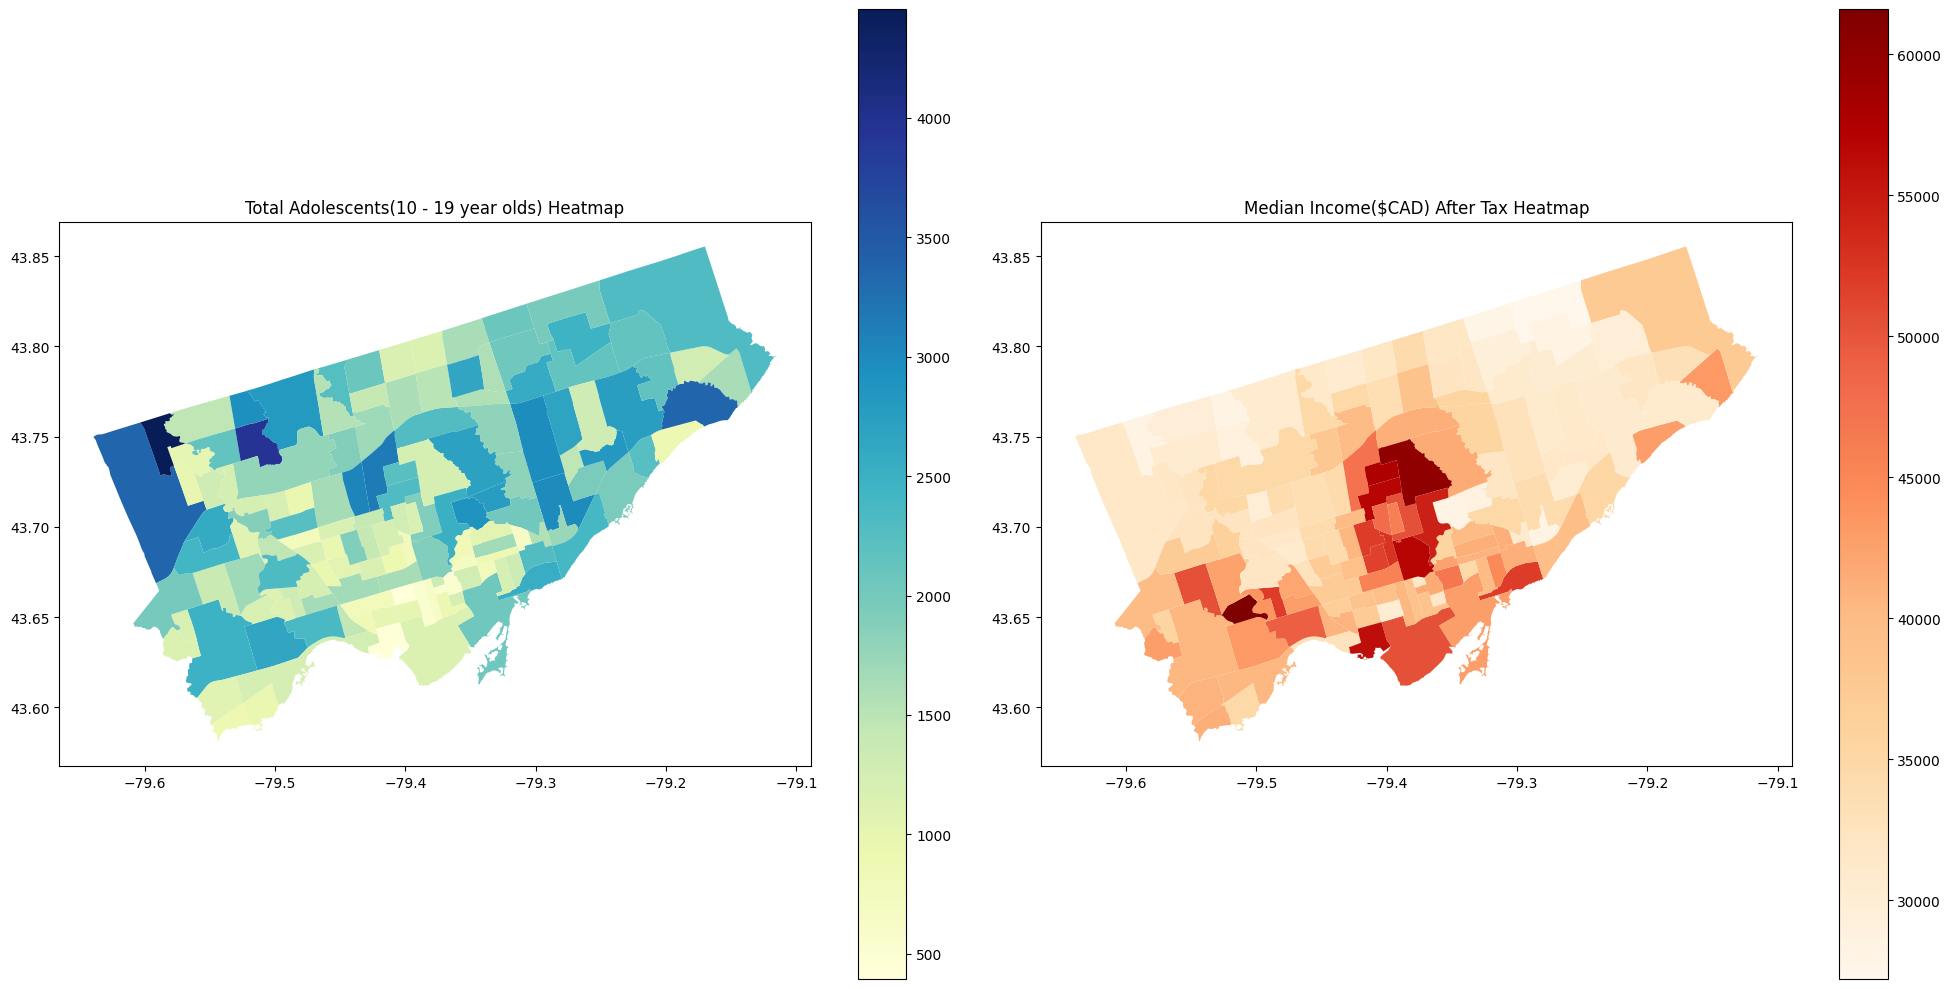

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the shapefile and Excel data
data = pd.read_excel("/content/drive/MyDrive/Mental Health Location BDC 2024 Datafiles/processed_neighborhoods_with_income.xlsx")  # Replace with your Excel file path

# Step 2: Extract the neighborhood number from the AREA_NAME column (shapefile)
neighborhoods['Neighborhood Number'] = neighborhoods['AREA_NAME'].str.extract(r'\((\d+)\)')

# Convert 'Neighborhood Number' in shapefile to integer
neighborhoods['Neighborhood Number'] = neighborhoods['Neighborhood Number'].astype(int)

# Step 3: Set the correct column names and process the Excel data
data.columns = ['Neighborhood Name', 'Total Adolescents', 'Median Income After Tax', 'Neighborhood Number']
data = data.dropna(subset=['Neighborhood Name', 'Total Adolescents', 'Median Income After Tax'])

# Ensure the 'Neighborhood Number' is integer type
data['Neighborhood Number'] = data['Neighborhood Number'].astype(int)

# Step 4: Merge the shapefile and Excel data on the neighborhood number
merged = neighborhoods.merge(
    data[['Neighborhood Number', 'Total Adolescents', 'Median Income After Tax']],
    on='Neighborhood Number',
    how='left'
)

# Step 5: Check for missing data (NaN values)
print(merged[['Neighborhood Number', 'Total Adolescents', 'Median Income After Tax']].head())
print(merged[['Total Adolescents', 'Median Income After Tax']].isna().sum())

# Step 6: Plot the heatmaps
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot Total Adolescents Heatmap
merged.plot(
    column='Total Adolescents',
    cmap='YlGnBu',
    legend=True,
    ax=ax[0]
)
ax[0].set_title('Total Adolescents(10 - 19 year olds) Heatmap')

# Plot Median Income After Tax Heatmap
merged.plot(
    column='Median Income After Tax',
    cmap='OrRd',
    legend=True,
    ax=ax[1]
)
ax[1].set_title('Median Income($CAD) After Tax Heatmap')

plt.tight_layout()
plt.show()


In [ ]:
pd.set_option('display.max_rows', None)

print(neighborhoods)

    AREA_S_CD                                 AREA_NAME  \
0         097                       Yonge-St.Clair (97)   
1         027              York University Heights (27)   
2         038                     Lansing-Westgate (38)   
3         031                   Yorkdale-Glen Park (31)   
4         016                  Stonegate-Queensway (16)   
5         118              Tam O'Shanter-Sullivan (118)   
6         063                          The Beaches (63)   
7         003          Thistletown-Beaumond Heights (3)   
8         055                     Thorncliffe Park (55)   
9         059                   Danforth East York (59)   
10        106                  Humewood-Cedarvale (106)   
11        014           Islington-City Centre West (14)   
12        066                             Danforth (66)   
13        028                               Rustic (28)   
14        139                 Scarborough Village (139)   
15        085                       South Parkdale (85) 